In [2]:
class DiffusionModel:
    def __init__(self) -> None:
        print(0)
        
class SIRModel(DiffusionModel):
    """
       Model Parameters to be specified via ModelConfig

       :param beta: The infection rate (float value in [0,1])
       :param gamma: The recovery rate (float value in [0,1])
    """

    def __init__(self):
        """
             Model Constructor

             :param graph: A networkx graph object
         """
        super(SIRModel, self).__init__()
        self.available_statuses = {
            "Susceptible": 0,
            "Infected": 1,
            "Removed": 2
        }

class Hsir(SIRModel):
    def __init__(self):
        """
             Model Constructor

             :param graph: A networkx graph object
         """
        super(self.__class__, self).__init__()
g = Hsir()

0


: 

In [11]:
import networkx as nx
g = nx.random_graphs.erdos_renyi_graph(5000, 0.02)
g.number_of_edges()
# pe = 0.002, 0.02, 0.04, 0.06
# 
# g = nx.random_graphs.barabasi_albert_graph(5000, 5)

250163

In [8]:
g = nx.random_graphs.watts_strogatz_graph(5000, 10, 0.1)
g.number_of_edges()
# p_w = 10, 100, 200, 300

25000

In [12]:
g = nx.random_graphs.barabasi_albert_graph(5000, 150)
g.number_of_edges()
# m = 5, 5, 100, 150

727500

In [96]:
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
from utils import save_obj
from enkf_diffnet import run
import networkx as nx
beta_t = 0.002
gamma_t = 0.001
Is = 0.002
for type in ['er','ba','ws']:
    if type == 'er':
        for p_e in [0.002, 0.02, 0.04, 0.06]:
            graph_para = {'type':'er','p_e': p_e, 'p_w':0.1, 'd':5, 'm': 5,  'n_nodes': 5000}
            g = nx.random_graphs.erdos_renyi_graph(5000, p_e) # 生成网络
            n_nodes = 5000
            model = ep.SIRModel(g)
            cfg = mc.Configuration()
            cfg.add_model_parameter('beta', beta_t)
            cfg.add_model_parameter('gamma', gamma_t)
            cfg.add_model_parameter("fraction_infected", Is) # 用模拟值做初始感染率
            model.set_initial_status(cfg)
            iterations = model.iteration_bunch(bunch_size=3000)
            trends = model.build_trends(iterations)
            save_obj(trends, './scen3_data/beta_{}gamma_{}p_{}type{}'.format(beta_t, gamma_t,p_e,type))
            gt_param = {'graph_para': graph_para, 'Is':0.002, 'beta_gt':beta_t, 'gamma_gt':gamma_t, 'gts': trends, 'n_nodes':5000, 'save_dir':'./scen3_data/res/'}
            run(gt_param, beta = 0.01, gamma=0.01, task = "all", Q_x = 1e-4, Q_param = 1e-4, P_x = 5e-4, P_param = 1e-2, R_x= 5e-3, N = 50, windows = 10, rounds =3000, measurement_mode='both', name="{}{}{}{}".format(type, p_e,beta_t, gamma_t))
            
    
            


save to:--->  ./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10er0.0020.0020.001


Test: 100%|██████████| 3000/3000 [24:01<00:00,  2.08it/s, param=(0.002030086083412192, 0.0011686324083728281)] 


save to:--->  ./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10er0.020.0020.001


Test: 100%|██████████| 3000/3000 [1:07:32<00:00,  1.35s/it, param=(0.0020236990650840826, 0.0012245171775508426)]


save to:--->  ./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10er0.040.0020.001


Test: 100%|██████████| 3000/3000 [1:49:59<00:00,  2.20s/it, param=(0.0021619309237703326, 0.0013466317362114866)]  


save to:--->  ./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10er0.060.0020.001


Test: 100%|██████████| 3000/3000 [2:21:17<00:00,  2.83s/it, param=(0.002396311720707644, 0.0011938037834919974)]   


In [100]:
import numpy as np
from utils import load_obj
res = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10er0.002.npy")
trends = load_obj(r"./scen3_data/beta_0.005gamma_0.003p_0.002typeer")
res2 = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10er0.02.npy")
trends2 = load_obj(r"./scen3_data/beta_0.005gamma_0.003p_0.02typeer")
res3 = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10er0.04.npy")
trends3 = load_obj(r"./scen3_data/beta_0.005gamma_0.003p_0.04typeer")
res4 = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10er0.06.npy")
trends4 = load_obj(r"./scen3_data/beta_0.005gamma_0.003p_0.06typeer")

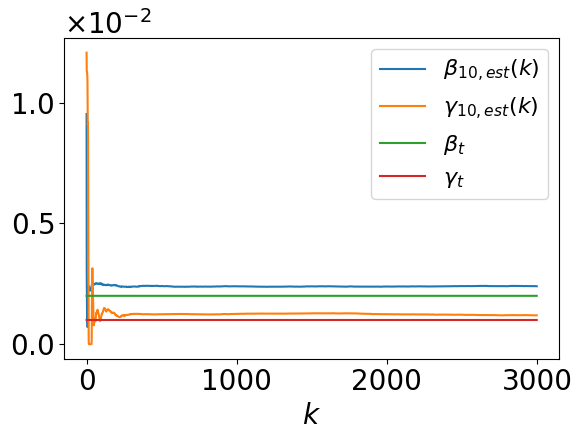

In [117]:
from utils import reverse_map
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20})
fig, ax1 = plt.subplots() 
# ax1.set_ylabel(r"the fraction of nodes", fontsize = 20, rotation = 90)
ax1.set_xlabel(r"$k$", fontsize = 20)
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)  # 设置为科学计数法
formatter.set_powerlimits((-1, 1))  # 设置科学计数法的阈值，这里设置为-3到3
plt.gca().yaxis.set_major_formatter(formatter)
ax1.plot([reverse_map(i) for i in res[:,2]], label = r"$\beta_{10,est}(k)$")
ax1.plot([reverse_map(i) for i in res[:,3]], label = r"$\gamma_{10,est}(k)$")
# ax1.plot([reverse_map(i) for i in res2[:,2]], label = r"$100$", c = 'g')
# ax1.plot([reverse_map(i) for i in res2[:,3]], c = 'g')
# ax1.plot([reverse_map(i) for i in res3[:,2]], label = r"$200$", c = 'c')
# ax1.plot([reverse_map(i) for i in res3[:,3]], c = 'c')
# ax1.plot([reverse_map(i) for i in res4[:,2]], label = r"$300$",c = 'slategrey')
# ax1.plot([reverse_map(i) for i in res4[:,3]], c = 'slategrey')
ax1.plot([0.002 for i in res[:,0]], label = r"$\beta_{t}$")
ax1.plot([0.001 for i in res[:,0]],label = r"$\gamma_{t}$")
plt.tight_layout()
ax1.legend(fontsize = 16,loc = "best")
plt.show()

In [166]:
l1 = []
beta_t = 0.002
gamma_t = 0.001
type = 'er'
for p_e in [0.002, 0.02, 0.04, 0.06]:
    res = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10er{}{}{}.npy".format(p_e,beta_t, gamma_t))
    trends = load_obj(r"./scen3_data/beta_0.002gamma_0.001p_{}typeer".format(p_e))
    def cal_acc(beta_t, gamma_t, trends, res):
        ave_beta = np.array([((reverse_map(i) - beta_t)**2)/(beta_t**2) for i in res[:,2][100:]]).mean()
        ave_gamma = np.array([((reverse_map(j) - gamma_t)**2)/(gamma_t**2) for j in res[:,3][100:]]).mean()
        ave_i = np.array([((a-b)/b)**2 for a,b in zip(res[:,0][15:], np.array(trends[0]['trends']['node_count'][1])[100:2600]/8846)]).mean()
        ave_r = np.array([((a-b)/b)**2 for a,b in zip(res[:,1][15:], np.array(trends[0]['trends']['node_count'][2])[100:2600]/8846)]).mean()
        return ave_beta, ave_gamma, ave_i, ave_r
    a,b,c,d = cal_acc(beta_t, gamma_t, trends, res)
    l1.append([a,b,c,d])
for i in range(4):
    print(l1[i][0]+l1[i][1])
    print(l1[i][2]+l1[i][3])

0.11441365927039276
1.0199534349239678
0.05637906252423819
1.2664868936055955
0.10531093480825904
1.2840321812216484
0.09539479607810673
1.2938169259691463


In [170]:
l1 = []
beta_t = 0.002
gamma_t = 0.001
type = 'er'
for m in [5, 50, 100, 150]:
    res = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10ba{}{}{}.npy".format(m,beta_t, gamma_t))
    trends = load_obj(r"./scen3_data/beta_0.002gamma_0.001m_{}typeba".format(m))
    def cal_acc(beta_t, gamma_t, trends, res):
        ave_beta = np.array([((reverse_map(i) - beta_t)**2)/(beta_t**2) for i in res[:,2][100:]]).mean()
        ave_gamma = np.array([((reverse_map(j) - gamma_t)**2)/(gamma_t**2) for j in res[:,3][100:]]).mean()
        ave_i = np.array([((a-b)/b)**2 for a,b in zip(res[:,0][15:], np.array(trends[0]['trends']['node_count'][1])[100:2600]/8846)]).mean()
        ave_r = np.array([((a-b)/b)**2 for a,b in zip(res[:,1][15:], np.array(trends[0]['trends']['node_count'][2])[100:2600]/8846)]).mean()
        return ave_beta, ave_gamma, ave_i, ave_r
    a,b,c,d = cal_acc(beta_t, gamma_t, trends, res)
    l1.append([a,b,c,d])
for i in range(4):
    print(l1[i][0]+l1[i][1])
    print(l1[i][2]+l1[i][3])

0.08777935322814807
1.0899308239173198
0.037011240972587504
1.2420083342109496
0.07516762403045044
1.2762769425973248
0.10694200427988348
1.2776960504332135


: 

In [168]:
l1 = []
beta_t = 0.002
gamma_t = 0.001
type = 'er'
for d in [10, 100, 200, 300]:
    res = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10ws{}{}{}.npy".format(d,beta_t, gamma_t))
    trends = load_obj(r"./scen3_data/beta_0.002gamma_0.001d_{}typews".format(d))
    def cal_acc(beta_t, gamma_t, trends, res):
        ave_beta = np.array([((reverse_map(i) - beta_t)**2)/(beta_t**2) for i in res[:,2][100:]]).mean()
        ave_gamma = np.array([((reverse_map(j) - gamma_t)**2)/(gamma_t**2) for j in res[:,3][100:]]).mean()
        ave_i = np.array([((a-b)/b)**2 for a,b in zip(res[:,0][15:], np.array(trends[0]['trends']['node_count'][1])[100:2600]/8846)]).mean()
        ave_r = np.array([((a-b)/b)**2 for a,b in zip(res[:,1][15:], np.array(trends[0]['trends']['node_count'][2])[100:2600]/8846)]).mean()
        return ave_beta, ave_gamma, ave_i, ave_r
    a,b,c,d = cal_acc(beta_t, gamma_t, trends, res)
    l1.append([a,b,c,d])
for i in range(4):
    print(l1[i][0]+l1[i][1])
    print(l1[i][2]+l1[i][3])

0.1381110485394023
0.9150281145142716
0.03663919489288139
1.260561927762383
0.0766148988964081
1.2791658362801839
0.05561447340936978
1.2874405774764168


In [150]:

for i in np.array([((reverse_map(j) - 0.0003 - gamma_t)**2)/(gamma_t**2) for j in res[:,3][120:200]]):
    print(i)

0.03740300923408419
0.02739476066828016
0.031566104210530216
0.014243825963910795
0.00929903673426789
0.0003556315160025083
0.0929864855625421
0.09895677365033932
0.03934987339935019
0.05905694666022841
0.027267351528597366
0.027232316970224386
0.033004144120954745
0.014172812368166138
0.00364958102411717
0.00043541137351927386
0.0024097112685482615
0.004681081086456511
0.014280374372125995
0.011680073064527815
0.014459267987500381
0.009478546278271755
0.011589344567556998
0.003705697770445247
0.012856212269826814
0.013133321813658163
0.0011895600461820563
0.00375601550024928
0.008332617820147142
0.011839222375935803
0.03662280776048005
0.08616424674421559
0.18423497241606274
0.1013414693357822
0.09709655955794048
0.150743644750839
0.24671839586288885
0.20577394319103515
0.21731855326237565
0.21385674084058212
0.23685183148652375
0.1265177467592285
0.19350219502230667
0.25143187452749555
0.6024976319821895
0.47579562348403437
0.6161863269257332
0.7619727685307703
1.0687175823222919
1.1

In [159]:
p_e = 0.002
res = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10er{}{}{}.npy".format(p_e,beta_t, gamma_t))
trends = load_obj(r"./scen3_data/beta_0.002gamma_0.001p_{}typeer".format(p_e))
def cal_acc(beta_t, gamma_t, trends, res):
    ave_beta = np.array([((reverse_map(i) - beta_t)**2)/(beta_t**2) for i in res[:,2][150:]]).mean()
    ave_gamma = np.array([((reverse_map(j) -gamma_t)**2)/(gamma_t**2) for j in res[:,3][300:]]).mean()
    ave_i = np.array([((a-b)/b)**2 for a,b in zip(res[:,0][15:], np.array(trends[0]['trends']['node_count'][1])[100:2600]/8846)]).mean()
    ave_r = np.array([((a-b)/b)**2 for a,b in zip(res[:,1][15:], np.array(trends[0]['trends']['node_count'][2])[100:2600]/8846)]).mean()
    return ave_beta, ave_gamma, ave_i, ave_r
a,b,c,d = cal_acc(beta_t, gamma_t, trends, res)

In [160]:
print(a)
print(b)

0.0014949051715968983
0.03601395298091221


In [161]:
print(a+b)
print(c+d)

0.03750885815250911
1.0199534349239678


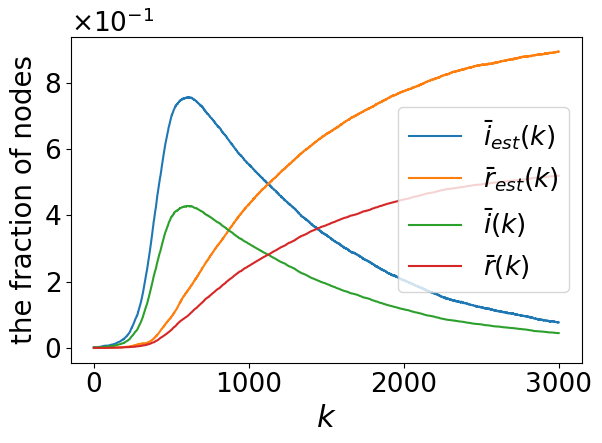

In [114]:
# res = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10ba5_before.npy")
# trends = load_obj(r"./scen3_data/beta_0.005gamma_0.003m_5typeba")
plt.rcParams.update({'font.size':19})
fig, ax1 = plt.subplots() 
ax1.set_ylabel(r"the fraction of nodes", fontsize = 20, rotation = 90)
ax1.set_xlabel(r"$k$", fontsize = 22)
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)  # 设置为科学计数法
formatter.set_powerlimits((-1, 1))  # 设置科学计数法的阈值，这里设置为-3到3
plt.gca().yaxis.set_major_formatter(formatter)
ax1.plot(res[:,0], label = r"$\bar{i}_{est}(k)$")
ax1.plot(res[:,1], label = r"$\bar{r}_{est}(k)$")
ax1.plot(np.array(trends[0]['trends']['node_count'][1])/8846, label = r"$\bar{i}(k)$")
ax1.plot(np.array(trends[0]['trends']['node_count'][2])/8846, label = r"$\bar{r}(k)$")
plt.tight_layout()
plt.legend()
plt.show()


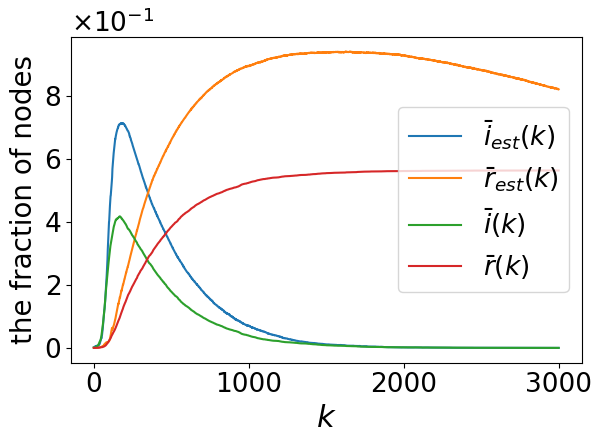

In [89]:
res = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10ba5_before.npy")
trends = load_obj(r"./scen3_data/beta_0.005gamma_0.003m_5typeba")
plt.rcParams.update({'font.size':19})
fig, ax1 = plt.subplots() 
ax1.set_ylabel(r"the fraction of nodes", fontsize = 20, rotation = 90)
ax1.set_xlabel(r"$k$", fontsize = 22)
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)  # 设置为科学计数法
formatter.set_powerlimits((-1, 1))  # 设置科学计数法的阈值，这里设置为-3到3
plt.gca().yaxis.set_major_formatter(formatter)
ax1.plot(res[:,0], label = r"$\bar{i}_{est}(k)$")
ax1.plot(res[:,1], label = r"$\bar{r}_{est}(k)$")
ax1.plot(np.array(trends[0]['trends']['node_count'][1])/8846, label = r"$\bar{i}(k)$")
ax1.plot(np.array(trends[0]['trends']['node_count'][2])/8846, label = r"$\bar{r}(k)$")
plt.tight_layout()
plt.legend()
plt.show()

In [57]:
l1

[[0.011536345488991401, 0.16808403368015282, inf, 0.4010990317277916],
 [0.0014800190792349569,
  0.04160489864646543,
  0.9941035037640061,
  0.42928629361627335],
 [0.038923133689911606, 0.07250508570710026, inf, 0.46720270985412715],
 [0.08882262445505046, 0.023463255027931174, inf, 0.4491317588372738]]

In [35]:
res = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10ws10.npy")
trends = load_obj(r"./scen3_data/beta_0.005gamma_0.003d_10typews")
res2 = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10ws100.npy")
trends2 = load_obj(r"./scen3_data/beta_0.005gamma_0.003d_100typews")
res3 = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10ws200.npy")
trends3 = load_obj(r"./scen3_data/beta_0.005gamma_0.003d_200typews")
res4 = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10ws300.npy")
trends4 = load_obj(r"./scen3_data/beta_0.005gamma_0.003d_300typews")

In [91]:
l1 = []
for d in [10, 100, 200, 300]:
    res = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10ws{}.npy".format(d))
    trends = load_obj(r"./scen3_data/beta_0.005gamma_0.003d_{}typews".format(d))
    def cal_acc(beta_t, gamma_t, trends, res):
        ave_beta = np.array([((reverse_map(i) - beta_t)**2)/(beta_t**2) for i in res[:,2][50:]]).mean()
        ave_gamma = np.array([((reverse_map(j) - gamma_t)**2)/(gamma_t**2) for j in res[:,3][50:]]).mean()
        ave_i = np.array([((a-b)/b)**2 for a,b in zip(res[:,0][15:], np.array(trends[0]['trends']['node_count'][1])[50:2400]/8846)]).mean()
        ave_r = np.array([((a-b)/b)**2 for a,b in zip(res[:,1][15:], np.array(trends[0]['trends']['node_count'][2])[50:2400]/8846)]).mean()
        return ave_beta, ave_gamma, ave_i, ave_r
    a,b,c,d = cal_acc(beta_t, gamma_t, trends, res)
    l1.append([a,b,c,d])
for i in range(4):
    print(l1[i][0]+l1[i][1])
    print(l1[i][2]+l1[i][3])

0.032743713489296264
1.290913405809066
0.02159793278815033
1.4136173359167543
0.051077286506520866
1.4468389202614982
0.05369978409017029
1.4097666498915973


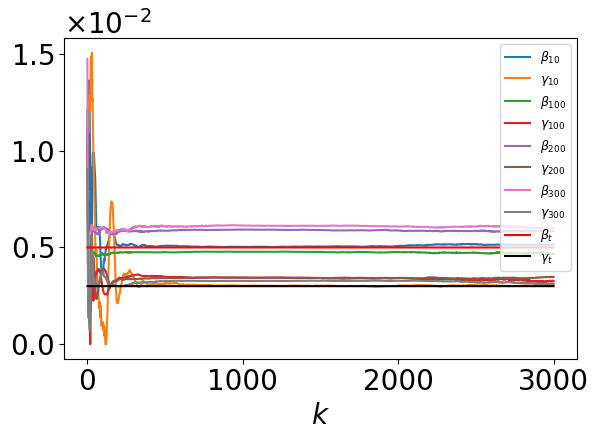

In [36]:
from utils import reverse_map
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20})
fig, ax1 = plt.subplots() 
# ax1.set_ylabel(r"the fraction of nodes", fontsize = 20, rotation = 90)
ax1.set_xlabel(r"$k$", fontsize = 20)
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)  # 设置为科学计数法
formatter.set_powerlimits((-1, 1))  # 设置科学计数法的阈值，这里设置为-3到3
plt.gca().yaxis.set_major_formatter(formatter)
# ax1.plot([(reverse_map(i)+reverse_map(j)+reverse_map(k))/3 for i,j,k in zip((res[:,2]), res2[:,2], res3[:,2])], label = r"$\beta_{est}(k)$")
# ax1.plot([(reverse_map(i)+reverse_map(j)+reverse_map(k))/3 for i,j,k in zip((res[:,3]), res2[:,3], res3[:,3])], label = r"$\gamma_{est}(k)$")
ax1.plot([reverse_map(i) for i in res[:,2]], label = r"$\beta_{10}$")
ax1.plot([reverse_map(i) for i in res[:,3]], label = r"$\gamma_{10}$")
ax1.plot([reverse_map(i) for i in res2[:,2]], label = r"$\beta_{100}$")
ax1.plot([reverse_map(i) for i in res2[:,3]], label = r"$\gamma_{100}$")
ax1.plot([reverse_map(i) for i in res3[:,2]], label = r"$\beta_{200}$")
ax1.plot([reverse_map(i) for i in res3[:,3]], label = r"$\gamma_{200}$")
ax1.plot([reverse_map(i) for i in res4[:,2]], label = r"$\beta_{300}$")
ax1.plot([reverse_map(i) for i in res4[:,3]], label = r"$\gamma_{300}$")
ax1.plot([0.005 for i in res[:,0]], label = r"$\beta_{t}$", c = 'r')
ax1.plot([0.003 for i in res[:,0]], label = r"$\gamma_{t}$", c = 'k')
plt.tight_layout()
ax1.legend(fontsize = 9,loc = "best")
plt.show()

In [93]:
res = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10ba5.npy")
trends = load_obj(r"./scen3_data/beta_0.005gamma_0.003m_5typeba")
res2 = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10ba50.npy")
trends2 = load_obj(r"./scen3_data/beta_0.005gamma_0.003m_50typeba")
res3 = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10ba100.npy")
trends3 = load_obj(r"./scen3_data/beta_0.005gamma_0.003m_100typeba")
res4 = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10ba150.npy")
trends4 = load_obj(r"./scen3_data/beta_0.005gamma_0.003m_150typeba")

In [95]:
l1 = []
for m in [5, 50, 100, 150]:
    res = np.load(r"./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10ba{}.npy".format(m))
    trends = load_obj(r"./scen3_data/beta_0.005gamma_0.003m_{}typeba".format(m))
    def cal_acc(beta_t, gamma_t, trends, res):
        ave_beta = np.array([((reverse_map(i) - beta_t)**2)/(beta_t**2) for i in res[:,2]]).mean()
        ave_gamma = np.array([((reverse_map(j) - gamma_t)**2)/(gamma_t**2) for j in res[:,3]]).mean()
        ave_i = np.array([((a-b)/b)**2 for a,b in zip(res[:,0][15:], np.array(trends[0]['trends']['node_count'][1])[50:2400]/8846)]).mean()
        ave_r = np.array([((a-b)/b)**2 for a,b in zip(res[:,1][15:], np.array(trends[0]['trends']['node_count'][2])[50:2400]/8846)]).mean()
        return ave_beta, ave_gamma, ave_i, ave_r
    a,b,c,d = cal_acc(beta_t, gamma_t, trends, res)
    l1.append([a,b,c,d])
for i in range(4):
    print(l1[i][0]+l1[i][1])
    print(l1[i][2]+l1[i][3])

0.1270766594715167
1.4629408561172148
0.04521652157513647
1.4204844825218297
0.0722758893227001
1.441352393487489
0.09324039349687464
1.500300346600768


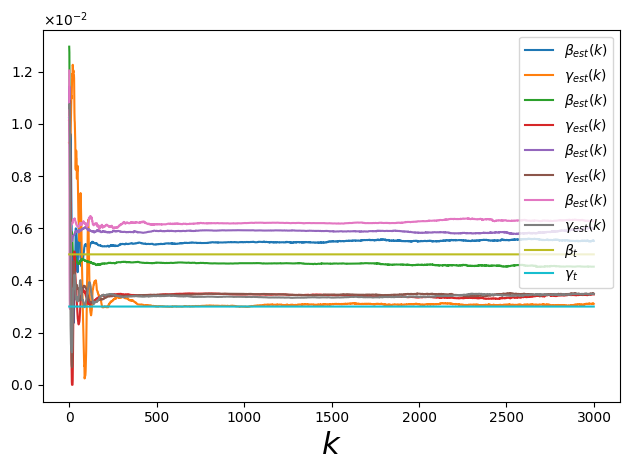

In [24]:
plt.rcParams.update({'font.size':10})
fig, ax1 = plt.subplots() 
# ax1.set_ylabel(r"the fraction of nodes", fontsize = 20, rotation = 90)
ax1.set_xlabel(r"$k$", fontsize = 22)
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)  # 设置为科学计数法
formatter.set_powerlimits((-1, 1))  # 设置科学计数法的阈值，这里设置为-3到3
plt.gca().yaxis.set_major_formatter(formatter)
# ax1.plot([(reverse_map(i)+reverse_map(j)+reverse_map(k))/3 for i,j,k in zip((res[:,2]), res2[:,2], res3[:,2])], label = r"$\beta_{est}(k)$")
# ax1.plot([(reverse_map(i)+reverse_map(j)+reverse_map(k))/3 for i,j,k in zip((res[:,3]), res2[:,3], res3[:,3])], label = r"$\gamma_{est}(k)$")
ax1.plot([reverse_map(i) for i in res[:,2]], label = r"$\beta_{est}(k)$")
ax1.plot([reverse_map(i) for i in res[:,3]], label = r"$\gamma_{est}(k)$")
ax1.plot([reverse_map(i) for i in res2[:,2]], label = r"$\beta_{est}(k)$")
ax1.plot([reverse_map(i) for i in res2[:,3]], label = r"$\gamma_{est}(k)$")
ax1.plot([reverse_map(i) for i in res3[:,2]], label = r"$\beta_{est}(k)$")
ax1.plot([reverse_map(i) for i in res3[:,3]], label = r"$\gamma_{est}(k)$")
ax1.plot([reverse_map(i) for i in res4[:,2]], label = r"$\beta_{est}(k)$")
ax1.plot([reverse_map(i) for i in res4[:,3]], label = r"$\gamma_{est}(k)$")
ax1.plot([0.005 for i in res[:,0]], label = r"$\beta_{t}$")
ax1.plot([0.003 for i in res[:,0]], label = r"$\gamma_{t}$")
plt.tight_layout()
ax1.legend(loc = "best")
plt.show()

In [ ]:

import ndlib.models.ModelConfig as mc
from utils import save_obj
from enkf_diffnet import run
import networkx as nx
beta_t = 0.005
gamma_t = 0.003
Is = 0.002
for type in ['er','ba','ws']:
    if type == 'ba':
        for m in [5, 5, 100, 150]:
            graph_para = {'type':'ba','p_e': 0.1, 'p_w':0.1, 'd':5, 'm': m,  'n_nodes': 5000}
            g = nx.random_graphs.barabasi_albert_graph(5000, m)
            n_nodes = 5000
            model = ep.SIRModel(g)
            cfg = mc.Configuration()
            cfg.add_model_parameter('beta', beta_t)
            cfg.add_model_parameter('gamma', gamma_t)
            cfg.add_model_parameter("fraction_infected", Is) # 用模拟值做初始感染率
            model.set_initial_status(cfg)
            iterations = model.iteration_bunch(bunch_size=3000)
            trends = model.build_trends(iterations)
            save_obj(trends, './scen3_data/beta_{}gamma_{}m_{}type{}'.format(beta_t, gamma_t,m,type))
            gt_param = {'graph_para': graph_para, 'Is':0.002, 'beta_gt':beta_t, 'gamma_gt':gamma_t, 'gts': trends, 'n_nodes':5000, 'save_dir':'./scen3_data/res/'}
            run(gt_param, beta = 0.01, gamma=0.01, task = "all", Q_x = 1e-4, Q_param = 1e-4, P_x = 5e-4, P_param = 1e-2, R_x= 5e-3, N = 50, windows = 10, rounds =3000, measurement_mode='both', name="{}{}".format(type, m))")

In [ ]:
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
from utils import save_obj
from enkf_diffnet import run
import networkx as nx
beta_t = 0.005
gamma_t = 0.003
Is = 0.002
for type in ['er','ba','ws']:
    if type == 'ws':
        for d in [10, 100, 200, 300]:
            graph_para = {'type':'ws','p_e': 0.1, 'p_w':0.1, 'd':d, 'm': 5,  'n_nodes': 5000}
            g = nx.random_graphs.watts_strogatz_graph(5000, d, 0.1)
            n_nodes = 5000
            model = ep.SIRModel(g)
            cfg = mc.Configuration()
            cfg.add_model_parameter('beta', beta_t)
            cfg.add_model_parameter('gamma', gamma_t)
            cfg.add_model_parameter("fraction_infected", Is) # 用模拟值做初始感染率
            model.set_initial_status(cfg)
            iterations = model.iteration_bunch(bunch_size=3000)
            trends = model.build_trends(iterations)
            save_obj(trends, './scen3_data/beta_{}gamma_{}d_{}type{}'.format(beta_t, gamma_t,d,type))
            gt_param = {'graph_para': graph_para, 'Is':0.002, 'beta_gt':beta_t, 'gamma_gt':gamma_t, 'gts': trends, 'n_nodes':5000, 'save_dir':'./scen3_data/res/'}
            run(gt_param, beta = 0.01, gamma=0.01, task = "all", Q_x = 1e-4, Q_param = 1e-4, P_x = 5e-4, P_param = 1e-2, R_x= 5e-3, N = 50, windows = 10, rounds =3000, measurement_mode='both', name="{}{}".format(type, d))

In [ ]:
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
from utils import save_obj
from enkf_diffnet import run
import networkx as nx
beta_t = 0.005
gamma_t = 0.003
Is = 0.002
for type in ['er','ba','ws']:
    if type == 'ba':
        for m in [5, 5, 100, 150]:
            graph_para = {'type':'ba','p_e': 0.1, 'p_w':0.1, 'd':5, 'm': m,  'n_nodes': 5000}
            g = nx.random_graphs.barabasi_albert_graph(5000, m)
            n_nodes = 5000
            model = ep.SIRModel(g)
            cfg = mc.Configuration()
            cfg.add_model_parameter('beta', beta_t)
            cfg.add_model_parameter('gamma', gamma_t)
            cfg.add_model_parameter("fraction_infected", Is) # 用模拟值做初始感染率
            model.set_initial_status(cfg)
            iterations = model.iteration_bunch(bunch_size=3000)
            trends = model.build_trends(iterations)
            save_obj(trends, './scen3_data/beta_{}gamma_{}m_{}type{}'.format(beta_t, gamma_t,m,type))
            gt_param = {'graph_para': graph_para, 'Is':0.002, 'beta_gt':beta_t, 'gamma_gt':gamma_t, 'gts': trends, 'n_nodes':5000, 'save_dir':'./scen3_data/res/'}
            run(gt_param, beta = 0.01, gamma=0.01, task = "all", Q_x = 1e-4, Q_param = 1e-4, P_x = 5e-4, P_param = 1e-2, R_x= 5e-3, N = 50, windows = 10, rounds =3000, measurement_mode='both', name="{}{}".format(type, m))